# Сравнение различных методов оптимизации

## Ньютон, GD, SGD, случайный поиск и Brent.

Рассмотрим некоторую функцию.

Вариант для решения задачи берём отсюда:
https://www.sfu.ca/~ssurjano/optimization.html

Номер берётся в соответствии вот с этим списком: [номера вариантов](<https://drive.google.com/file/d/19485VeTcpwzZnn4Yqybfkj_pLlfYJ-z9/view?usp=sharing>)


Рассмотрим следующую функцию (<font color="red"> $$f(x)=-0.001(|\sin(x_{1})\sin(x_{2})\exp(|100-\frac{\sqrt{{x_1}^{2}+{x_2}^{}}}{\pi}|)|+1)^{0.1},\;\;\; x \in [-10, 10]$$) 
$$\color{lime}{f(x) = (x + \sin x) e^x, \;\;\; x \in [-20, 0]}$$ 
    

* Реализовать метод Ньютона, GD, SGD, один из методов случайного поиска (0-го порядка) на Ваш выбор исходя из вида функции (подберите оптимальный вариант).

* Добавьте к решению метод Brent из [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brent.html). Сравните результаты, полученные для Вашей функции с помощью этих  методов, с точки зрения итераций, времени, количества вызовов оракула.

# Метод Ньютона

In [1]:
import autograd.numpy as agnp
import autograd.numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as optimize
from numpy.random import rand
import autograd
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from sympy import symbols, diff, Symbol
from sympy import lambdify
from sympy.solvers import solve
from scipy import linalg

In [2]:
def f(x):
    a=abs(100-np.sqrt(x[0]*x[0]+x[1]*x[1])/np.pi)
    b=abs(np.sin(x[0])*np.sin(x[1])*np.exp(a))+1
    c=-0.0001*b**0.1
    return c

In [3]:

def newton(f, x0, tol=0.00001, iters=1000):
    x = x0
    f1 = autograd.grad(f)
    f11 = autograd.hessian(f)
    for i in range(iters):
        delta = agnp.linalg.solve(np.linalg.inv(f11(x0)),f1(x0))
        x-=delta
        if agnp.linalg.norm(delta)<=tol:
            break
    return x
            
x0 = agnp.array([3.0, 5.0])
start_time = time.time()
res = newton(f,x0)
newton_time = time.time() - start_time
newton_result = f(res)
print("time: ",newton_time)

time:  0.27992796897888184


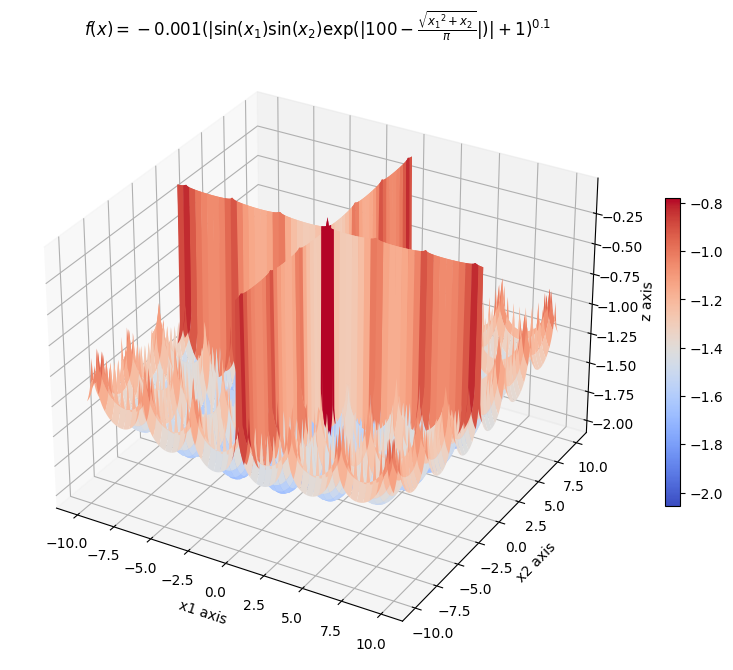

In [4]:
x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.1)
x1, x2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.set_title(r'$f(x)=-0.001(|\sin(x_{1})\sin(x_{2})\exp(|100-\frac{\sqrt{{x_1}^{2}+{x_2}^{}}}{\pi}|)|+1)^{0.1}$')
ax.set_xlabel('x1 axis')
ax.set_ylabel('x2 axis')
ax.set_zlabel('z axis')


a=abs(100-np.sqrt(x1*x1+x2*x2)/np.pi)
b=abs(np.sin(x1)*np.sin(x2)*np.exp(a))+1
c=-0.0001*b**0.1
    
f = c

surface = ax.plot_surface(x1, x2, f, cmap=cm.coolwarm, linewidth=0)
fig.colorbar(surface, shrink=0.5)
plt.show()

# GD

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy import*

# def f(x1,x2):
#     a=abs(100-sqrt(x1*x1+x2*x2)/pi)
#     b=abs(sin(x1)*sin(x2)*exp(a))+1
#     c=-0.0001*b**0.1
#     return c
def f(x):
    a=abs(100-np.sqrt(x[0]*x[0]+x[1]*x[1])/np.pi)
    b=abs(np.sin(x[0])*np.sin(x[1])*np.exp(a))+1
    c=-0.0001*b**0.1
    return c
x1=linspace(-10,10,100)
x2=linspace(-10,10,100)
X=meshgrid(x1,x2)

In [6]:
x1=linspace(-10,10,100)
x2=linspace(-10,10,100)
X=[]
for i in range(len(x1)):
    for j in range(len(x2)):
        X.append([x1[i],x2[j]])
X=np.array(X)
print(X[0])

[-10. -10.]


In [7]:
# theta=0

# def gradient_descent2(start, learn_rate,n_iter=10, tolerance=0.01):
#     x = start
#     a=autograd.grad(f)
#     for _ in range(n_iter):
#         for i in range(len(X)):
#             delta= -learn_rate * a(X[i])
#             if agnp.linalg.norm(x+delta)<=tolerance:
#                 break
#             x+=delta
#     return x


In [8]:
# def gradient_descent2(start, learn_rate,n_iter=10, tolerance=0.01):
#     x_history=[]
#     x = start
#     a=autograd.grad(f)
#     for _ in range(n_iter):
#         for i in range(len(X)):
#             last_x=x
#             x_history.append(last_x)
#             print(x_history)
#             x+= -learn_rate * a(X[i])
#             if abs(x-last_x)<=tolerance:
#                 break
#     return x
import math
def gradient_descent(start, learn_rate,n_iter=5, tolerance=0.01):
    x = start
    a=autograd.grad(f)
    for _ in range(n_iter):
        for i in range(len(X)):
            delta= -learn_rate * a(X[i])
            x+=delta
            last_delta=x

            if math.dist(last_delta,delta)<=tolerance:
                break
    return x

In [9]:
x0 = agnp.array([3.0, 5.0])
start_time = time.time()
gd_time = time.time() - start_time
res = gradient_descent(start=x0, learn_rate=0.01)
gd_result = f(res)
print("time" ,gd_time)

time 1.0967254638671875e-05


# Стохастический градиентный спуск

In [10]:
import random
def stochastic_gradient_descent(start, learn_rate,n_iter=5, tolerance=0.01):
    x = start
    a=autograd.grad(f)
    for _ in range(n_iter):
        for i in range(len(X)):
            rndm = random.randint(1,len(X)-1)
            delta= -learn_rate * a(X[rndm])
            if agnp.linalg.norm(x+delta)<=tolerance:
                break
            x+=delta
    return x

In [11]:
x0 = agnp.array([3.0, 5.0])
start_time = time.time()
res = stochastic_gradient_descent(start=x0, learn_rate=0.01)
sgd_time = time.time() - start_time
sgd_result =f(res)
print("time" ,sgd_time)

time 10.172693014144897


# Случайный поиск

In [12]:
from random import random
def my_function(x):
    a=abs(100-np.sqrt(x[0]*x[0]+x[1]*x[1])/np.pi)
    b=abs(np.sin(x[0])*np.sin(x[1])*np.exp(a))+1
    c=-0.0001*b**0.1
    return c


def optimize_rn(bounds, NFE, f):
    D = len(bounds)
    best_f = 9999.0
    best_x = [None]*D

    for i in range(NFE):
        new_x = [bounds[d][0] + random()*(bounds[d][1] - bounds[d][0]) for d in range(D)]
        new_f = f(new_x)
        if new_f < best_f:
            best_f = new_f
            best_x = new_x

    return {'best_x': best_x, 'best_f': best_f}


bounds = [[-5, 5], [-5, 5]]

start_time = time.time()
result = optimize_rn(bounds, 10000, my_function)

random_search_time = time.time() - start_time
random_search_result= result['best_f']
print(result)
print("time: ",random_search_time)

{'best_x': [-1.3481906027254151, -1.346097113384758], 'best_f': -2.0626104854241167}
time:  0.053613901138305664


# Newton from scipy

In [13]:
from scipy.optimize import minimize
f1 = autograd.grad(f)
f11=autograd.hessian(f)
res = minimize(f, [3,5], method='Newton-CG', jac=f1, hess=f11)
res

     fun: -1.8899380457855686
     jac: array([-8.10100403e-10, -5.32777295e-11])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 7
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.47062216, 4.41907587])

# Брент

Алгоритм Брента применим к функциям с одной переменной, поэтому остаётся только представить x1 и x2 как x

In [14]:
def brent_func(x):
    a=abs(100-np.sqrt(x*x+x*x)/np.pi)
    b=abs(np.sin(x)*np.sin(x)*np.exp(a))+1
    c=-0.0001*b**0.1
    return c

In [15]:
start_time = time.time()
res = optimize.brent(brent_func, brack=(-10, 10))

brent_time = time.time() - start_time
brent_res = res
print("time: ",brent_time)

time:  0.002835988998413086


In [16]:
res

-1.3494065818134913

#  Сравнение

In [17]:
pd.DataFrame({
    'method':[
        'Newton',
        'GD',
        'SGD',
        'Random Search',
        'Brent'
    ],
    'time':[
        newton_time,
        gd_time,
        sgd_time,
        random_search_time,
        brent_time
    ],
    'result':[
        newton_result,
        gd_result,
        sgd_result,
        random_search_result,
        brent_res
    ]
})

method       time    result
0         Newton   0.279928 -1.790602
1             GD   0.000011 -1.497873
2            SGD  10.172693 -1.416201
3  Random Search   0.053614 -2.062610
4          Brent   0.002836 -1.349407

# Вывод

Лучше всего себя показал метод Ньютона и градиентный спук, он почти дошёл до глобального минимума функции(при меньшем шаге можно получить лучшие результаты я думаю). Так же отлично себя показал алгоритм случайного поиска, при этом он работает намного быстрее

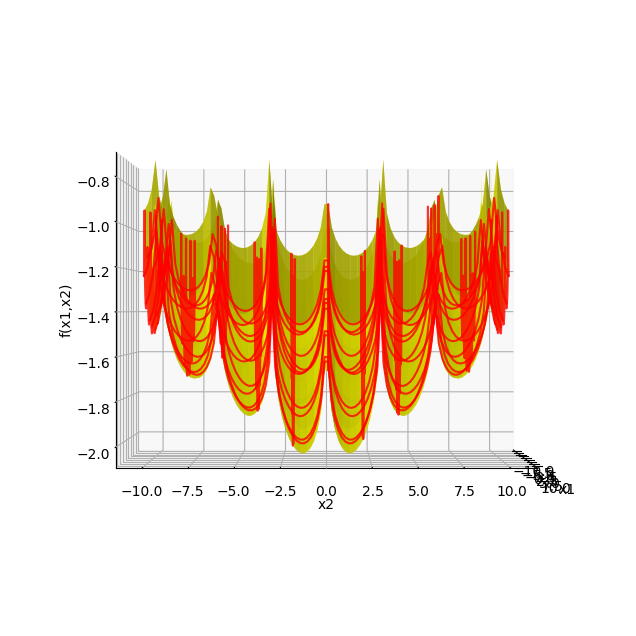

interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

In [18]:

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy import*

def f(x1,x2):
    a=abs(100-sqrt(x1*x1+x2*x2)/pi)
    b=abs(sin(x1)*sin(x2)*exp(a))+1
    c=-0.0001*b**0.1
    return c
x1=linspace(-10,10,100)
x2=linspace(-10,10,100)
X1,X2=meshgrid(x1,x2)

def plotter(E,A):
    fig=plt.figure(figsize=[12,8])
    ax=plt.axes(projection='3d')
    ax.plot_surface(X1,X2,f(X1,X2),color='yellow',alpha=0.7)
  
    ax.plot_wireframe(X1,X2,f(X1,X2), ccount=10,rcount=10,color='red', alpha=0.8)
    ax.view_init(elev=E,azim=A)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')
    plt.show()

from ipywidgets import interactive
iplot=interactive(plotter,E=(-90,90,5),A=(-90,90,5))
iplot

## 🔽 Линейный поиск, метод наискорейшего спуска
Рассмотрим функцию [Розенброка](<https://en.wikipedia.org/wiki/Rosenbrock_function>):
    
$$
f(x_1, x_2) =  10(x_2 − x_1^2)^2 + (x_1 − 1)^22
$$

Пусть $x_0 = (-1, 2)^\top$ --  начальная точка. Реализуйте алгоритм градиентного спуска:

$$
x^{k+1} = x^k - \alpha^k \nabla f(x^k),
$$

где размер шага выбирается на каждой итерации путем решения следующей задачи линейного поиска

$$
\alpha^k = \arg\min\limits_{\alpha \in \mathbb{R}^+}{f(x^k - \alpha \nabla f(x^k))}.
$$

Выберите любой метод линейного поиска в этой задаче и постройте 2 графика: значение функции в зависимости от номера итерации и значение функции в зависимости от количества вызовов функции (учитывайте только вызовы функций, не включая вызовы градиента).


## ❓ Числовой линейный поиск  хорошо подходит для сильно выпуклых функций
Контрольный вопрос: в случае одномерной минимизации  сильно выпуклой квадратичной функции выполняется условие Поляка (-Лоясевича)? Если да, то всегда ли?

Условие Поляка-Лоясевича является обобщением сильной выпуклости на невыпуклые задачи и не требует ни выпуклости, ни единственности минимизаторов.

# Методы оптимизации нулевого порядка

## 🤹 Глобальная оптимизация с помощью scipy
Рассмотрите функцию из вашего варианта, например $f: \mathbb{R}^d \to \mathbb{R}$ for d = 10. [link](https://www.sfu.ca/~ssurjano/rastr.html)

$$
\color{lime}{f(\mathbf{x})=10 d+\sum_{i=1}^{d}\left[x_{i}^{2}-10 \cos \left(2 \pi x_{i}\right)\right]}
$$

* Рассмотрите методы глобальной оптимизации из [scipy](https://docs.scipy.org/doc/scipy/reference/optimize.html#global-optimization).
* Постройте 5 графиков для разных значений параметра $d \in \{2,4,8,10,33\}$. На каждом графике нужно нанести $f$ из $N_{fev}$ для 5 методов: `basinhopping`, `brute`, `differential_evolution`, `shgo`, `dual_annealing` из scipy, где $N_{fev}$ - количество оценок функции. Эта информация обычно доступна из `specific_optimizer.nfev`.
Если нужно задать ограничения для оптимизатора, используйте диапазон $x_i \in [-5, 5]$.

В моём варианте нет параметра d, поэтому будет использовать функцию-пример

In [19]:
def funct(x):
    res=10*len(x)
    for i in range(len(x)):
        res+=x[i]**2-10*cos(2*pi*x[i])
    return res
print(funct([1,2]))

5.0


In [20]:
def funct2(x,*args):
    res=10*args
    for i in range(args):
        res+=x[i]**2-10*cos(2*pi*x[i])
    return res
print(funct([1,2]))

5.0


In [21]:
import scipy.optimize as so

bs = so.basinhopping(funct,[2,3,4,5,6])
bs

                        fun: 4.085620730620576e-14
 lowest_optimization_result:       fun: 4.085620730620576e-14
 hess_inv: array([[ 2.55661557e-03, -1.45666364e-05, -3.77763447e-05,
         5.81404370e-06, -2.72195964e-05],
       [-1.45666364e-05,  2.54224818e-03,  2.04201558e-05,
        -2.77217814e-06,  1.30210576e-05],
       [-3.77763447e-05,  2.04201558e-05,  2.61495504e-03,
         9.78004253e-06,  3.46274572e-05],
       [ 5.81404370e-06, -2.77217814e-06,  9.78004253e-06,
         2.52709415e-03, -9.19233841e-06],
       [-2.72195964e-05,  1.30210576e-05,  3.46274572e-05,
        -9.19233841e-06,  2.56613427e-03]])
      jac: array([-1.43051147e-06,  9.53674316e-07,  3.81469727e-06,  3.57627869e-07,
        1.31130219e-06])
  message: 'Optimization terminated successfully.'
     nfev: 144
      nit: 13
     njev: 24
   status: 0
  success: True
        x: array([-1.03858514e-08, -5.19419657e-09,  2.09512843e-09, -6.63516783e-09,
       -4.00262551e-09])
                    

In [22]:

brute= so.brute(funct,[(-5,5)])
brute

array([-1.98988744])

In [23]:
differential_evo = so.differential_evolution(funct,[(-5,5)])
differential_evo

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 437
     nit: 28
 success: True
       x: array([-1.03062558e-09])

In [24]:
shg = so.shgo(funct,[(-5,5)])
shg

     fun: 0.0
    funl: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 2
   nlfev: 13
   nlhev: 0
   nljev: 1
 success: True
       x: array([-2.25357084e-11])
      xl: array([[-2.25357084e-11]])

In [25]:
dual_an =so.dual_annealing(funct,[(-5,5)])
dual_an

     fun: 3.552713678800501e-15
 message: ['Maximum number of iteration reached']
    nfev: 2033
    nhev: 0
     nit: 1000
    njev: 16
  status: 0
 success: True
       x: array([-4.24406707e-09])

In [26]:
d2=[]
for i in range(2):
    a=random.uniform(-5.0,5.0)
    b=random.uniform(-5.0,5.0)
    if b>a:
        a,b=b,a
    d2+=[(random.uniform(-5.0,5.0),random.uniform(-5.0,5.0))]
d4=[]
for i in range(4):
    d4+=[(random.uniform(-5.0,5.0),random.uniform(-5.0,5.0))]
d8=[]
for i in range(8):
    d8+=[(random.uniform(-5.0,5.0),random.uniform(-5.0,5.0))]
d10=[]
for i in range(10):
    d10+=[(random.uniform(-5.0,5.0),random.uniform(-5.0,5.0))]
d33=[]
for i in range(33):
    d33+=[(random.uniform(-5.0,5.0),random.uniform(-5.0,5.0))]

In [27]:
d2_2=[]
for i in range(2):
    d2_2.append(random.uniform(-5.0,5.0))
d4_2=[]
for i in range(4):
    a=random.uniform(-5.0,5.0)
    d4_2.append(random.uniform(-5.0,5.0))
d8_2=[]
for i in range(8):
    d8_2.append(random.uniform(-5.0,5.0))
d10_2=[]
for i in range(10):
    d10_2.append(random.uniform(-5.0,5.0))
d33_2=[]
for i in range(33):
    d33_2.append(random.uniform(-5.0,5.0))

## Basinhopping

In [28]:
df = pd.DataFrame(columns=['d','nfev'])
df.loc[len(df.index)]=[2,so.basinhopping(funct,d2_2).nfev]
df.loc[len(df.index)]=[4,so.basinhopping(funct,d4_2).nfev]
df.loc[len(df.index)]=[8,so.basinhopping(funct,d8_2).nfev]
df.loc[len(df.index)]=[10,so.basinhopping(funct,d10_2).nfev]
df.loc[len(df.index)]=[33,so.basinhopping(funct,d33_2).nfev]


In [29]:
df

d    nfev
0   2    3741
1   4    9985
2   8   28620
3  10   40755
4  33  368140

In [30]:
import plotly.express as px
fig = px.bar(df, x='d', y='nfev')
fig.show()

# Gradient descent

## Как параметр влияет на оптимизацию градиента

   Рассмотрим функцию двух переменных:

$$
е (х_1, х_2) = х_1 ^ 2 + к х_2 ^ 2,
$$

где $k$ — некоторый параметр

In [31]:
def f(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    x_1, x_2 = x
    return x_1**2 + k*x_2**2

def df(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    return np.array([2*x[0], 2*k*x[1]])


In [32]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

def plot_3d_function(x1, x2, f, title, *f_params, minima = None, iterations = None):
    '''
    '''
    low_lim_1 = x1.min()
    low_lim_2 = x2.min()
    up_lim_1  = x1.max()
    up_lim_2  = x2.max()

    X1,X2 = np.meshgrid(x1, x2) # grid of point
    Z = f((X1, X2), *f_params) # evaluation of the function on the grid
    
    # set up a figure twice as wide as it is tall
    fig = plt.figure(figsize=(16,7))
    fig.suptitle(title)

    #===============
    #  First subplot
    #===============
    # set up the axes for the first plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    # plot a 3D surface like in the example mplot3d/surface3d_demo
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, 
                        cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, f(minima_), 'r*', markersize=10)
    
    

    #===============
    # Second subplot
    #===============
    # set up the axes for the second plot
    ax = fig.add_subplot(1, 2, 2)

    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    im = ax.imshow(Z,cmap=plt.cm.RdBu,  extent=[low_lim_1, up_lim_1, low_lim_2, up_lim_2])
    cset = ax.contour(x1, x2,Z,linewidths=2,cmap=plt.cm.Set2)
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    fig.colorbar(im)
    ax.set_xlabel(f'$x_1$')
    ax.set_ylabel(f'$x_2$')
    
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, 'r*', markersize=10)
    
    if iterations is not None:
        for point in iterations:
            ax.plot(*point, 'go', markersize=3)
        iterations = np.array(iterations).T
        ax.quiver(iterations[0,:-1], iterations[1,:-1], iterations[0,1:]-iterations[0,:-1], iterations[1,1:]-iterations[1,:-1], scale_units='xy', angles='xy', scale=1, color='blue')

    plt.show()

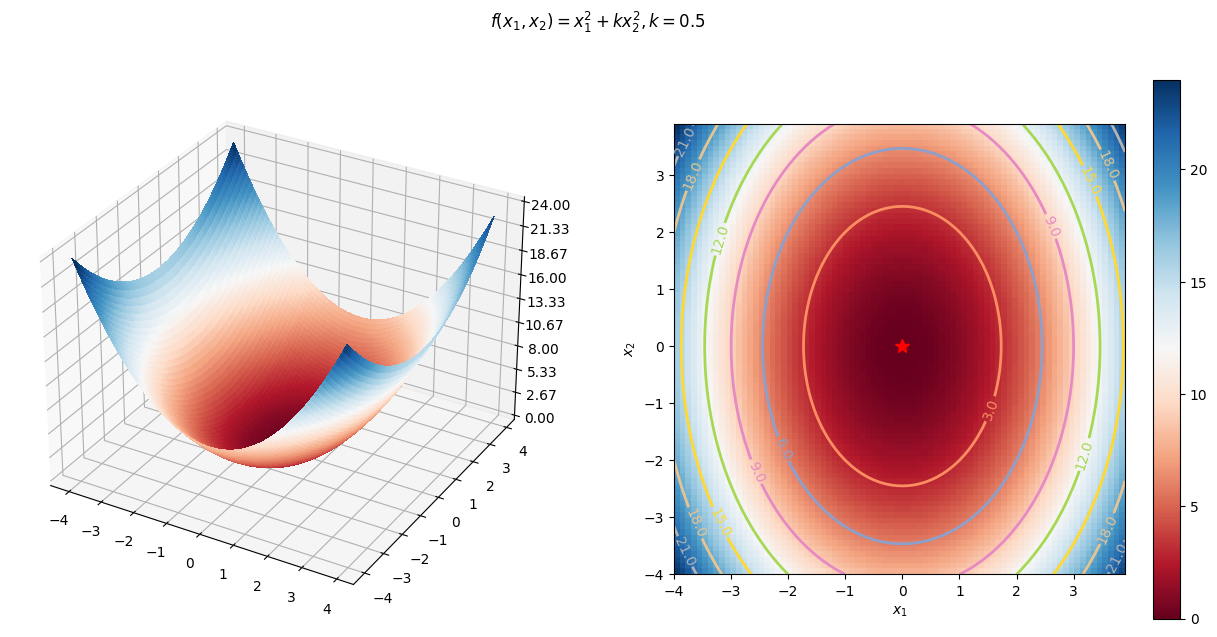

In [33]:
up_lim  = 4
low_lim = -up_lim
x1 = np.arange(low_lim, up_lim, 0.1)
x2 = np.arange(low_lim, up_lim, 0.1)
k=0.5
title = f'$f(x_1, x_2) = x_1^2 + k x_2^2, k = {k}$'

plot_3d_function(x1, x2, f, title, k, minima=[0,0])

Например, алгоритм наискорейшего спуска можно изобразить  с помощью следующего кода:

Finished with 44 iterations


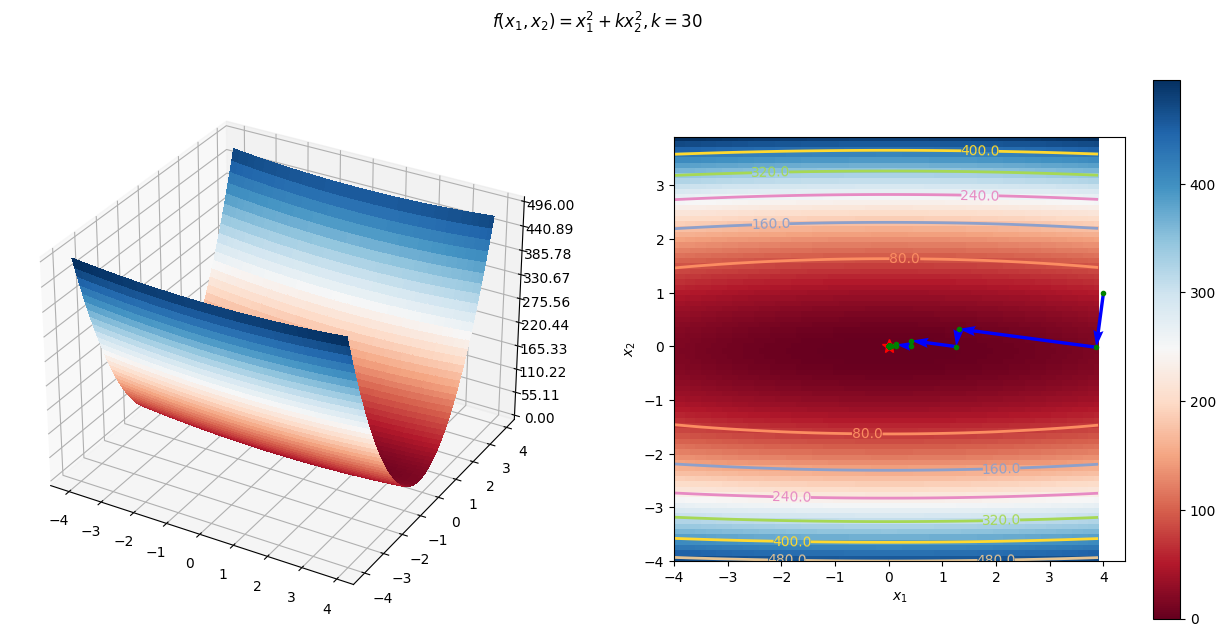

In [34]:
from scipy.optimize import minimize_scalar

def steepest_descent(x_0, f, df, *f_params, df_eps = 1e-2, max_iter = 1000):
    iterations = []
    x = np.array(x_0)
    iterations.append(x)
    while np.linalg.norm(df(x, *f_params)) > df_eps and len(iterations) <= max_iter:
        res = minimize_scalar(lambda alpha: f(x - alpha * df(x, *f_params), *f_params))
        alpha_opt = res.x
        x = x - alpha_opt * df(x, *f_params)
        iterations.append(x)
    print(f'Finished with {len(iterations)} iterations')
    return iterations

x_0 = [4,1]
k = 30
iterations = steepest_descent(x_0, f, df, k, df_eps = 1e-9)
title = f'$f(x_1, x_2) = x_1^2 + k x_2^2, k = {k}$'

plot_3d_function(x1, x2, f, title, k, minima=[0,0], iterations = iterations)

Добавьте в вашу функцию некоторый параметр. Постройте количество итераций, необходимых для сходимости алгоритма наискорейшего спуска для вашей функции в зависимости от значения параметра. Например, рассмотрим интервал $k \in [10^{-3}; 10^3]$ (удобно будет использовать функцию `ks = np.logspace(-3,3)`) и отложить по оси X в логарифмическом масштабе `plt.semilogx()` или `plt.loglog( )` для двойного логарифмического масштаба.

Сделайте такие же графики для подходящего постоянного размера шага. Объясните результаты.

In [35]:
### ВАШ КОД ЗДЕСЬ

<font color="lime"> ==YOUR ANSWER== </font>

In [36]:
def func2(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    x1, x2 = x
    a=abs(100-sqrt(x1*x1+x2*x2)/pi)
    b=abs(sin(x1)*sin(x2)*exp(a))+1
    c=-0.0001*b**0.1
    return c


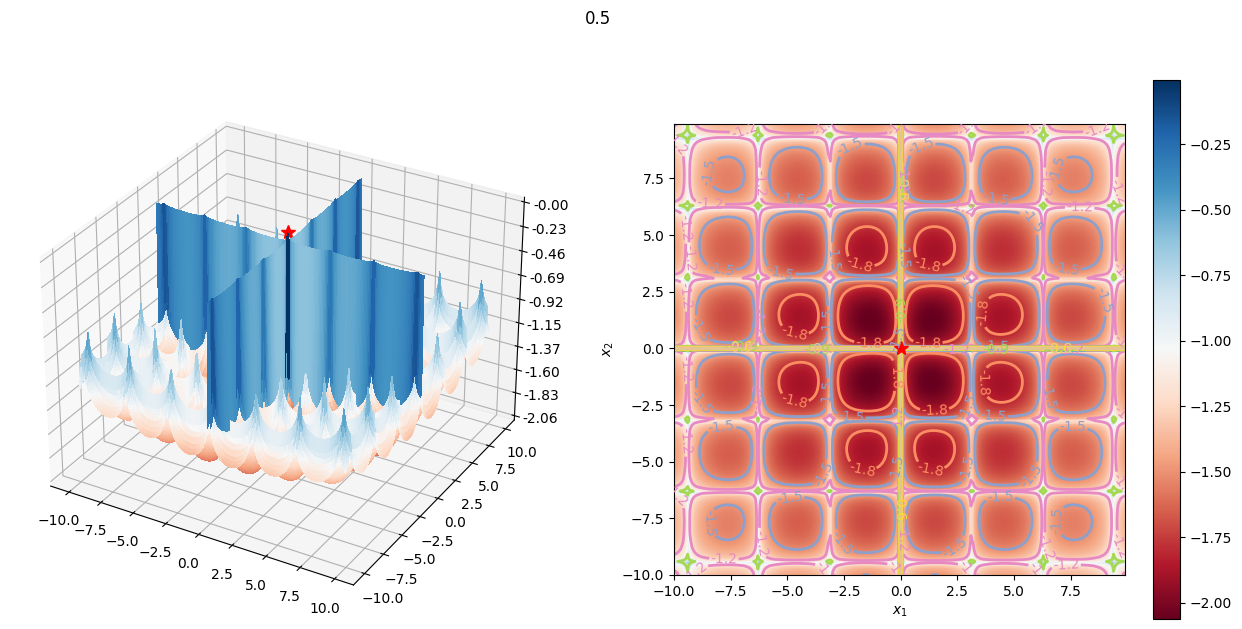

In [37]:
x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.1)
k=0.5

plot_3d_function(x1, x2, func2,  k, minima=[0,0])

# Метод Ньютона. Квазиньютоновские методы

## Контрольный вопрос: Проблема сходимости метода Ньютона
Рассмотрите следующую функцию:

$$
f(x,y) = \dfrac{x^4}{4} - x^2 + 2x + (y-1)^2
$$

И точку старта $x_0 = (0,2)^\top$. Как ведет себя метод Ньютона, запущенный с этой точки? Чем это можно объяснить? 

Как ведет себя градиентный спуск с фикисрованным шагом $\alpha = 0.01$ и метод наискорейшего спуска в таких же условиях?
(в этом задании не обязательно показывать численные симуляции)

Проанализируейте сходимость для вашей функции для различных стартовых точек. Визуализируйте результат.

<font color="lime"> ==YOUR ANSWER== </font>

Для проверки сходимости будем смотреть на результаты методов с разными начальными точками.

In [38]:
def f_2(x):
    return (x[0]**4)/4 - x[0]**2 + 2*x[0] + (x[1] - 1)**2

def df_2(x):
    df1 = x[0]**3 - 2*x[0] + 2
    df2 = 2*(x[1] - 1)
    return np.array([df1, df2])

def d2f_2(x):
    d2f = np.zeros((2, 2))
    d2f[0, 0] = 3*x[0]**2 - 2
    d2f[1, 1] = 2
    return d2f

def newton(f, df, d2f, x0, tol=1e-6):
    x = x0
    while True:
        x_new = x - np.linalg.inv(d2f(x)).dot(df(x))
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x
x0 = np.array([2,5])
# x0 = np.array([2,5]) метод Ньютона не работает, это обьясняется тем что первый элемент не должен быть равен 0
xmin = newton(f_2, df_2, d2f_2, x0)
print(f'Минимум в {xmin} со значением функции {f_2(xmin)}')

Минимум в [-1.76929235  1.        ] со значением функции -4.219136248741586


-1.769292354251341
-1.7692923936589082
-1.769292354251341
-1.7692923542973595


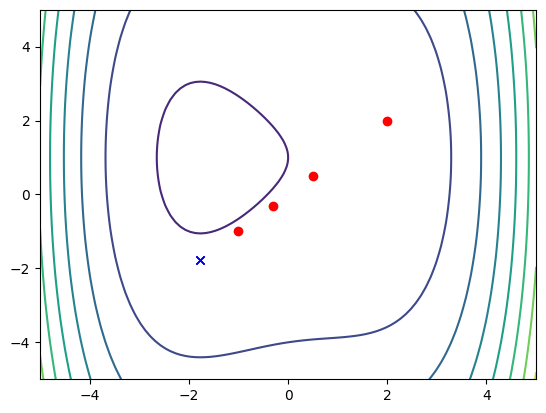

In [39]:
x0s = [np.array([0.5, 0.5]), np.array([-0.3, -0.3]), np.array([2, 2]), np.array([-1.0, -1.0])]

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f_2([X, Y])

plt.contour(X, Y, Z)

for x0 in x0s:
    xmin, num_iter = newton(f_2, df_2, d2f_2, x0)
    print(xmin)
    plt.plot(x0[0], x0[1], 'ro')
    plt.plot(xmin, xmin, 'bx')

plt.show()

Градиентный спуск

In [40]:
def gradient_descent(f, df, x0, alpha=0.01, tol=1e-6):
    x = x0
    while True:
        x_new = x - alpha * df(x)
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x

x0 = np.array([0, 2])
xmin = gradient_descent(f_2, df_2, x0)
print(f'Минимум в  {xmin} со значением {f_2(xmin)}')

Минимум в  [-1.76929235  1.0000492 ] со значением -4.219136246320522


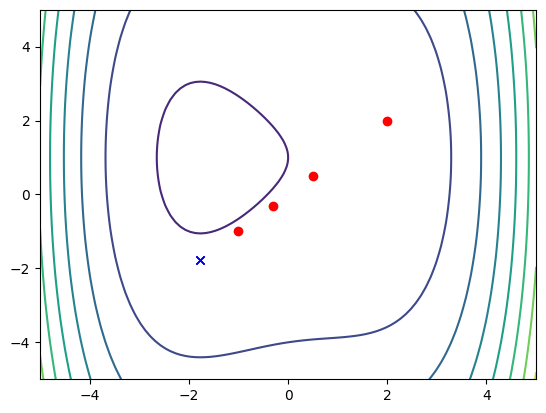

In [41]:
x0s = [np.array([0.5, 0.5]), np.array([-0.3, -0.3]), np.array([2, 2]), np.array([-1.0, -1.0])]


x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f_2([X, Y])

plt.contour(X, Y, Z)

for x0 in x0s:
    xmin, num_iter = gradient_descent(f_2, df_2, x0)
    plt.plot(x0[0], x0[1], 'ro')
    plt.plot(xmin, xmin, 'bx')

plt.show()

Метод наискорейшего спуска

In [42]:
import numpy as np
from scipy.optimize import minimize_scalar

def steepest_descent(f, df, x0, tol=1e-6):
    x = x0
    while True:
        p = -df(x)
        alpha = minimize_scalar(lambda alpha: f(x + alpha * p)).x
        x_new = x + alpha * p
        if np.all(np.abs(x_new - x) < tol):
            break
        x = x_new
    return x

x0 = np.array([0, 2])
xmin = steepest_descent(f_2, df_2, x0)
print(f'Минимум в {xmin} со значением {f_2(xmin)}')

Минимум в [-1.76929279  0.99999838] со значением -4.219136248738265


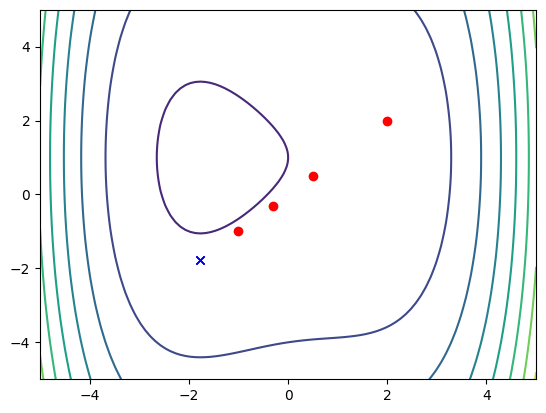

In [43]:
x0s = [np.array([0.5, 0.5]), np.array([-0.3, -0.3]), np.array([2, 2]), np.array([-1.0, -1.0])]


x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f_2([X, Y])

plt.contour(X, Y, Z)

for x0 in x0s:
    xmin, num_iter = steepest_descent(f_2, df_2, x0)
    plt.plot(x0[0], x0[1], 'ro')
    plt.plot(xmin, xmin, 'bx')

plt.show()

## ⏰ Квази-сравнение методов
Реализуйте на языке python:
* метод Ньютона
* метод SR-1

для минимизации Вашей функций:


Сравните 2 реализованных Вами метода И [метод](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html) `BFGS` из библиотеки `scipy`, а так же его модификацию [L-BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) в решении задачи минимизации описанных выше функций. точку старта необходимо инициализировать одинаковую для всех методов в рамках одного запуска. Необходимо провести не менее 10 запусков для каждого метода на каждой функции до достижения того критерия остановки, который вы выберете (например, расстояние до точки оптимума - во всех задачах мы её знаем)

##В качестве результата нужно заполнить следующие таблички, заполнив в них усредненное по числу запусков количество итераций, необходимых для сходимости и времени работы:

Критерий остановки `__0.0001__`

Число запусков `_______`

P.S. если в силу каких то причин Вам не удалось сделать задание полностью, попробуйте сфокусироваться хотя бы на его части.

| Квадратичная форма. n = 2 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |       1    |   0.0019249916076660156  |
|            SR-1           |      19    |   0.01758289337158203    |
|            BFGS           |       3    |   0.0022699832916259766  |
|           L-BFGS          |       1    |   0.004110813140869141   |

| Квадратичная форма. n = 50 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |       1    |    0.0021419525146484375 |
|            SR-1           |       19   |    0.00963902473449707   |
|            BFGS           |       3    |    0.001009225845336914  |
|           L-BFGS          |       1    |    0.0014638900756835938 |


| Квадратичная форма. n = 228 | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |       1    |   0.002686023712158203  |
|            SR-1           |       19   |   0.009510278701782227  |
|            BFGS           |       3    |   0.0010449886322021484 |
|           L-BFGS          |       1    |   0.010896921157836914 |

| Функция Розенброка | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |      228   |   0.23038411140441895   |
|            SR-1           |      110   |   0.10262513160705566   |
|            BFGS           |      52    |   0.020801782608032227  |
|           L-BFGS          |      27    |   0.003245115280151367  |

In [44]:
import autograd.numpy as agnp
import autograd.numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as optimize
from numpy.random import rand
import autograd
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from sympy import symbols, diff, Symbol
from sympy import lambdify
from sympy.solvers import solve
from scipy import linalg

## Newtons

In [45]:
def f(x):
    a=abs(100-np.sqrt(x[0]*x[0]+x[1]*x[1])/np.pi)
    b=abs(np.sin(x[0])*np.sin(x[1])*np.exp(a))+1
    c=-0.0001*b**0.1
    return c

In [46]:
def newton(f, x0, tol=0.00001, iters=1000):
    x = x0
    f1 = autograd.grad(f)
    f11 = autograd.hessian(f)
    count = 0
    for i in range(iters):
        count += 1
        delta = agnp.linalg.solve(np.linalg.inv(f11(x0)),-f1(x0))
        x+=delta
        if agnp.linalg.norm(delta)<tol:
            break
            print(f'niter: {count}')
    print(f'niter: {count}')
    return x
            
x0 = agnp.array([4.0, 1.0])
start_time = time.time()
res = newton(f,x0)
newton_time = time.time() - start_time
newton_result = f(res)
print("time: ",newton_time)

niter: 184
time:  0.27628016471862793


maxiter = 2

In [47]:
start_time = time.time()
print([round(s, 10) for s in newton(f, x0, iters=2)])
newton_time = time.time() - start_time
print(newton_time)

niter: 1
[4.4189540175, 1.47042805]
0.0019249916076660156


maxiter = 50

In [48]:
start_time = time.time()
print([round(s, 10) for s in newton(f, x0, iters=50)])
newton_time = time.time() - start_time
print(newton_time)

niter: 1
[4.4189589597, 1.4704358224]
0.0021419525146484375


maxiter = 228

In [49]:
start_time = time.time()
print([round(s, 10) for s in newton(f, x0, iters=228)])
newton_time = time.time() - start_time
print(newton_time)

niter: 1
[4.4189637012, 1.4704432836]
0.002686023712158203


# SR-1

In [51]:
iters=[2,50,228]

In [52]:
for i in iters:
    print("\n","Num of iters",i)
    start_time = time.time()
    es = optimize.minimize(f, x0, method='trust-constr', hess=optimize.SR1())
    print([round(s, 7) for s in es.x])
    print(es.nit)
    print(time.time() - start_time)


 Num of iters 2
[4.4190758, 1.4706222]
19
0.01758289337158203

 Num of iters 50
[4.4190758, 1.4706222]
19
0.00963902473449707

 Num of iters 228
[4.4190758, 1.4706222]
19
0.009510278701782227


# BFGS

In [53]:
for i in iters:
    print("\n","Num of iters",i)
    start_time = time.time()
    es = optimize.minimize(f, x0, method='BFGS')
    print([round(s, 7) for s in es.x])
    print(es.nit)
    print(time.time() - start_time)


 Num of iters 2
[4.4190759, 1.4706218]
3
0.0022699832916259766

 Num of iters 50
[4.4190759, 1.4706218]
3
0.001009225845336914

 Num of iters 228
[4.4190759, 1.4706218]
3
0.0010449886322021484


# L-BFGS

In [54]:
for i in iters:
    print("\n","Num of iters",i)
    start_time = time.time()
    es = optimize.minimize(f, x0, method='L-BFGS-B')
    print([round(s, 7) for s in es.x])
    print(es.nit)
    print(time.time() - start_time)


 Num of iters 2
[4.4190816, 1.470631]
1
0.004110813140869141

 Num of iters 50
[4.4190816, 1.470631]
1
0.0014638900756835938

 Num of iters 228
[4.4190816, 1.470631]
1
0.0018510818481445312


## Rosenbroke

In [55]:
def rosen(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

In [56]:
start_time = time.time()
print([s for s in newton(rosen, agnp.array([5.0, 6.0]), iters=228)])
rosen_time = time.time() - start_time
print(rosen_time)

/opt/homebrew/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning:

overflow encountered in power

/opt/homebrew/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:59: RuntimeWarning:

overflow encountered in double_scalars

/opt/homebrew/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:35: RuntimeWarning:

invalid value encountered in double_scalars



niter: 228
[nan, nan]
0.23038411140441895


In [57]:
start_time = time.time()
es = optimize.minimize(rosen, x0, method='trust-constr', hess=optimize.SR1(), options={'maxiter': 228})
print([round(s, 7) for s in es.x])
print(es.nit)
print(time.time() - start_time)

[0.999996, 0.9999919]
110
0.10262513160705566


In [58]:
start_time = time.time()
es = optimize.minimize(rosen, x0, method='BFGS', options={'maxiter': 228})
print([round(s, 7) for s in es.x])
print(es.nit)
print(time.time() - start_time)

[0.9999955, 0.9999911]
52
0.010896921157836914


In [59]:
start_time = time.time()
es = optimize.minimize(rosen, x0, method='L-BFGS-B', options={'maxiter': 228})
print([round(s, 7) for s in es.x])
print(es.nit)
print(time.time() - start_time)

[0.999997, 0.999994]
27
0.003245115280151367
